In [148]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
norm?

__A:__ The Second argument is `.pdf (probability density function).pdf(x, loc=0, scale=1)`.
    Probability density function. From the docs: 
    
The probability density function for `norm` is:


$f(x) = \frac{\exp(-x^2/2)}{\sqrt{2\pi}}$

for a real number $x$.

The probability density above is defined in the "standardized" form. To shift
and/or scale the distribution use the ``loc`` and ``scale`` parameters.
Specifically, ``norm.pdf(x, loc, scale)`` is identically
equivalent to ``norm.pdf(y) / scale`` with
``y = (x - loc) / scale``.

The `loc` function is the mean and the `scale` function is the standard deviation.

__Q:__ Use the method that generates random variates to draw five samples from the standard normal distribution.

__A:__

In [154]:
seed(47)
five_samples = norm.rvs(size=5)

__Q:__ What is the mean of this sample? Is it exactly equal to the value you expected? Hint: the sample was drawn from the standard normal distribution.

__A:__ It is not exactly equal to the value I expected:

In [156]:
np.mean(five_samples)


0.19355593334131074

__Q:__ What is the standard deviation of these numbers? Calculate this manually here as $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}$. Hint: np.sqrt() and np.sum() will be useful here and remember that numpy supports [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

__A:__

In [157]:
distances_from_mean = five_samples - np.mean(five_samples)
variance = np.sum(distances_from_mean**2)/5
standard_deviation = np.sqrt(variance)

standard_deviation

0.9606195639478641

__Q:__ If all we had to go on was our five samples, what would be our best estimate of the population standard deviation? This is where we use Bessel's correction (the $n-1$ in the denominator), thus $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}}$.

__A:__

In [158]:
distances_from_mean = five_samples - np.mean(five_samples)
variance = np.sum(distances_from_mean**2)/(5-1)
standard_deviation = np.sqrt(variance)

standard_deviation

1.0740053227518152

__Q:__ Now use numpy's std function to calculate the standard deviation of our random samples. Which of the above standard deviations did it return?

__A:__

In [159]:
np.std(five_samples) # np.std returns the standard deviation with n in the denominator, not n-1.

0.9606195639478641

__Q:__ Consult the documentation for np.std() to see how to apply the correction for estimating the population parameter and verify this produces the expected result.

__A:__

In [30]:
np.std?

In [160]:
np.std(five_samples, ddof=1) # ddof specifies delta degrees of freedom, subtracted from n in denominator

1.0740053227518152

*(The next two cells were given in the assignment prompt and are required for subsequent answers to run correctly.)*

Let's give our normal distribution a little flavor. Also, for didactic purposes, the standard normal distribution, with its variance equal to its standard deviation of one would not be a great illustration of a key point. Let us imagine we live in a town of 50000 people and we know the height of everyone in this town. We will have 50000 numbers that tell us everything about our population. We'll simulate these numbers now and put ourselves in one particular town, called 'town 47', where the population mean height is 172 cm and population standard deviation is 5 cm.

In [168]:
seed(47)
pop_heights = norm.rvs(172, 5, size=50000)

In [169]:
def townsfolk_sampler(n):
    return np.random.choice(pop_heights, n)

__Q:__ Simulate performing this random trial every day for a year, calculating the mean of each daily sample of 10, and plot the resultant sampling distribution of the mean.

__A:__

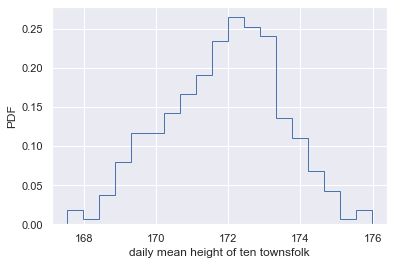

In [170]:
seed(47)
daily_means = np.empty(365)
for i in range(365):
    daily_means[i] = np.mean(townsfolk_sampler(10))

sns.set()

plt.hist(daily_means, bins=int(np.sqrt(365)), density=True, histtype='step')
plt.xlabel('daily mean height of ten townsfolk')
plt.ylabel('PDF')
plt.show()

The above is the distribution of the means of samples of size 10 taken from our population. The Central Limit Theorem tells us the expected mean of this distribution will be equal to the population mean, and standard deviation will be $\sigma / \sqrt n$, which, in this case, should be approximately 1.58.

__Q:__ Verify the above results from the CLT.

__A:__

In [171]:
np.mean(daily_means)

171.8660049358649

In [172]:
np.std(daily_means, ddof=1)

1.5778333114768472

Remember, here we knew our population parameters, that the average height really is 172 cm and the standard deviation 5 cm, and we see some of our daily estimates of the population mean were as low as around 168 and some as high as 176.

__Q:__ Repeat the above year's worth of samples but for a sample size of 50 (perhaps you had a bigger budget for conducting surveys that year!) Would you expect your distribution of sample means to be wider (more variable) or narrower (more consistent)? Compare your resultant summary statistics to those predicted by the CLT.

__A:__ Because the sample size $n$ is in the denominator of the sample'standard deviation formula, the resulting distribution should be narrower (more consistent). This makes sense intuitively, becuase as sample size increases, it better represents the population (central limit theorem).

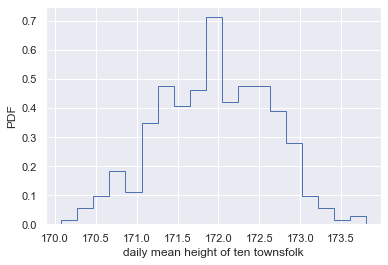

In [173]:
seed(47)
seed(47)
daily_means = np.empty(365)
for i in range(365):
    daily_means[i] = np.mean(townsfolk_sampler(50))

sns.set()

plt.hist(daily_means, bins=int(np.sqrt(365)), density=True, histtype='step')
plt.xlabel('daily mean height of ten townsfolk')
plt.ylabel('PDF')
plt.show()


__Q:__ Using the fact that about 68% of observations lie within plus or minus 1 standard deviation of the mean in a normal distribution, calculate the probability of observing the value 1 or less in a single observation from the standard normal distribution.

__A:__ The standard normal distribution has a mean of 0 and a standard deviation of 1. The range between -1 and 1 ($-\sigma$ and $\sigma$) encompasses a probability of 68%, which leaves 32% of probability beyond the interval of 1 standard deviation. The left tail's interval beyond 1 standard deviation is still less than one, which makes the probability of a value of less than one equal to $68\% + \frac{32\%}{2} \approx 84\%$.

__Q:__ Use the cdf() function to answer the question above again and verify you get the same answer.

__A:__

In [174]:
norm.cdf(1, loc=0, scale=1) # including optional keywords for mean and std for clarity

0.8413447460685429

__Q:__ Using our knowledge of the population parameters for our townsfolk's heights, what is the probability of selecting one person at random and their height being 177 cm or less? Calculate this using both of the approaches given above.

__A:__ We know that the population's standard deviation is 5 cm, and 177 cm is 1 standard deviation from the known population mean of 172. This means there's an 84% chance that someone's height is 177 cm or less.

In [175]:
# Using the cdf function
norm.cdf(177, loc=172, scale=5)

0.8413447460685429

__Q:__ Turning this question around. Let's say we randomly pick one person and measure their height and find they are 2.00 m tall? How surprised should we be at this result, given what we know about the population distribution? In other words, how likely would it be to obtain a value at least as extreme as this? Express this as a probability.

__A:__ The probability would be nearly zero:

In [176]:
1 - norm.cdf(200, loc=172, scale=5)

1.0717590259723409e-08

__Q:__ Let's now start from the position of knowing nothing about the heights of people in our town.
* Use our favorite random seed of 47, to randomly sample the heights of 50 townsfolk
* Estimate the population mean using np.mean
* Estimate the population standard deviation using np.std (remember which denominator to use!)
* Calculate the (95%) [margin of error](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/margin-of-error/#WhatMofE) (use the exact critial z value to 2 decimal places - [look this up](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/find-critical-values/) or use norm.ppf())
* Calculate the 95% Confidence Interval of the mean
* Does this interval include the true population mean?

__A:__ The $z$ interval includs the true population mean:

In [177]:
seed(47)
fifty_heights = townsfolk_sampler(50)
sample_mean = np.mean(fifty_heights)
sample_sigma = np.std(fifty_heights, ddof=1)
margin_of_error = (norm.ppf(.975, loc=sample_mean, scale=sample_sigma) - sample_mean) / sample_sigma
confidence_lower = sample_mean - sample_sigma * margin_of_error
confidence_upper = sample_mean + sample_sigma * margin_of_error

print('The estimated population mean is ' + str(sample_mean) + ".")
print('The estimated population standard deviation is ' + str(sample_sigma) + ".")
print('We are 95% confident that the true value of the population mean lies between ' + str(confidence_lower) + ' cm and ' + str(confidence_upper) + ' cm.')

The estimated population mean is 172.7815108576788.
The estimated population standard deviation is 4.195424364433547.
We are 95% confident that the true value of the population mean lies between 164.5586302035272 cm and 181.0043915118304 cm.


__Q:__ Above, you calculated the confidence interval using the critical z value. What is the problem with this? What requirement, or requirements, are we (strictly) failing?

__A:__ We are building a confidence interval using the sample's standard deviation as an estimate of the population's standard deviation, rather than using the true population parameter.

__Q:__ Calculate the 95% confidence interval for the mean using the _t_ distribution. Is this wider or narrower than that based on the normal distribution above? If you're unsure, you may find this [resource](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/confidence-interval/) useful. For calculating the critical value, remember how you could calculate this for the normal distribution using norm.ppf().

__A:__ The $t$ distribution is wider than the standard distribution (the tails are less light); the $t$ interval still includes the true population mean.

In [178]:
seed(47)
fifty_heights = townsfolk_sampler(50)
sample_mean = np.mean(fifty_heights)
sample_sigma = np.std(fifty_heights, ddof=1)
margin_of_error = (t.ppf(.975, (50-1), loc=sample_mean, scale=sample_sigma) - sample_mean) / sample_sigma
confidence_lower = sample_mean - sample_sigma * margin_of_error
confidence_upper = sample_mean + sample_sigma * margin_of_error

print('The estimated population mean is ' + str(sample_mean) + ".")
print('The estimated population standard deviation is ' + str(sample_sigma) + ".")
print('We are 95% confident that the true value of the population mean lies between ' + str(confidence_lower) + ' cm and ' + str(confidence_upper) + ' cm.')

The estimated population mean is 172.7815108576788.
The estimated population standard deviation is 4.195424364433547.
We are 95% confident that the true value of the population mean lies between 164.35048995674052 cm and 181.21253175861708 cm.


This is slightly wider than the previous confidence interval. This reflects the greater uncertainty given that we are estimating population parameters from a sample.